In [1]:
import pandas as pd
df = pd.read_csv('24_train_1.csv')
df

,ArticleId,Text,Category
0,1429,sfa awaits report over mikoliunas the scottish...,sport
1,1896,parmalat to return to stockmarket parmalat th...,business
2,1633,edu blasts arsenal arsenal s brazilian midfiel...,sport
3,2178,henman decides to quit davis cup tim henman ha...,sport
4,194,french suitor holds lse meeting european stock...,business
...,...,...,...
995,1250,blair damaged by blunkett row a majority of ...,politics
996,1639,a november to remember last saturday one news...,sport
997,916,highbury tunnel players in clear the football ...,sport
998,2217,top stars join us tsunami tv show brad pitt r...,entertainment


In [2]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

# stemming tool from nltk
stemmer = PorterStemmer()
# a mapping dictionary that help remove punctuations
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
def get_tokens(text):
  # turn document into lowercase
  lowers = text.lower()
  # remove punctuations
  no_punctuation = lowers.translate(remove_punctuation_map)
  # tokenize document
  tokens = nltk.word_tokenize(no_punctuation)
  # remove stop words
  filtered = [w for w in tokens if not w in stopwords.words('english')]
  # stemming process
  stemmed = []
  for item in filtered:
      stemmed.append(stemmer.stem(item))
  # final unigrams
  return stemmed

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(tokenizer= get_tokens ,max_features = 5000)

In [4]:
Y = df['Category']
X = tfidf.fit_transform(df['Text'])

/Users/prajwalanand/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=18)

In [6]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [7]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=42)
clf = clf.fit(X_train, Y_train)
Y_predTrain_gini = clf.predict(X_train)
Y_pred_gini = clf.predict(X_val)
trainAcc_gini = accuracy_score(Y_train, Y_predTrain_gini)
valAcc_gini = accuracy_score(Y_val, Y_pred_gini)

In [8]:
trainAcc_gini

1.0

In [9]:
valAcc_gini

0.82

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
clf = clf.fit(X_train, Y_train)
Y_predTrain_entro = clf.predict(X_train)
Y_pred_entro = clf.predict(X_val)
trainAcc_entro = accuracy_score(Y_train, Y_predTrain_entro)
valAcc_entro = accuracy_score(Y_val, Y_pred_entro)

In [11]:
trainAcc_entro

1.0

In [12]:
valAcc_entro

0.765

In [13]:
import matplotlib.pyplot as plt

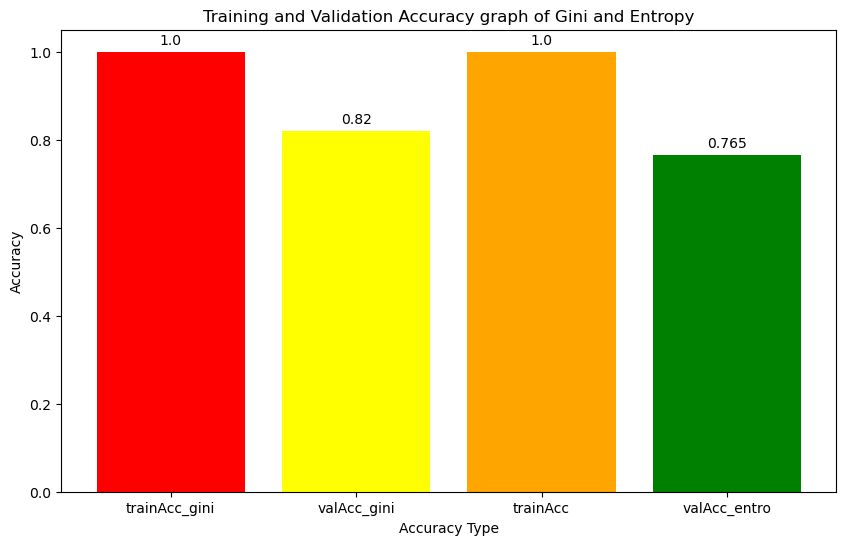

In [14]:
labels = ['trainAcc_gini', 'valAcc_gini', 'trainAcc', 'valAcc_entro']
values = [trainAcc_gini, valAcc_gini, trainAcc_entro, valAcc_entro]
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['red', 'yellow', 'orange', 'green'])
plt.xlabel('Accuracy Type')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy graph of Gini and Entropy')
for bar, value in zip(bars, values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(value, 3), ha='center', va='bottom', color='black')
plt.show()

Results Table:
   min_samples_leaf  train_accuracy  avg_train_accuracy  std_train_accuracy  \
0                 1         0.76500             0.76500            0.046871   
1                 5         0.76875             0.76875            0.048412   
2                10         0.75625             0.75625            0.027951   
3                50         0.65750             0.65750            0.023848   
4               100         0.47250             0.47250            0.033448   
5               150         0.39250             0.39250            0.037791   
6               200         0.37500             0.37500            0.023049   
7               250         0.31125             0.31125            0.013346   
8               300         0.30750             0.30750            0.010000   

   val_accuracy  avg_val_accuracy  std_val_accuracy  
0         0.665             0.665          0.056125  
1         0.635             0.635          0.060415  
2         0.645             0.64

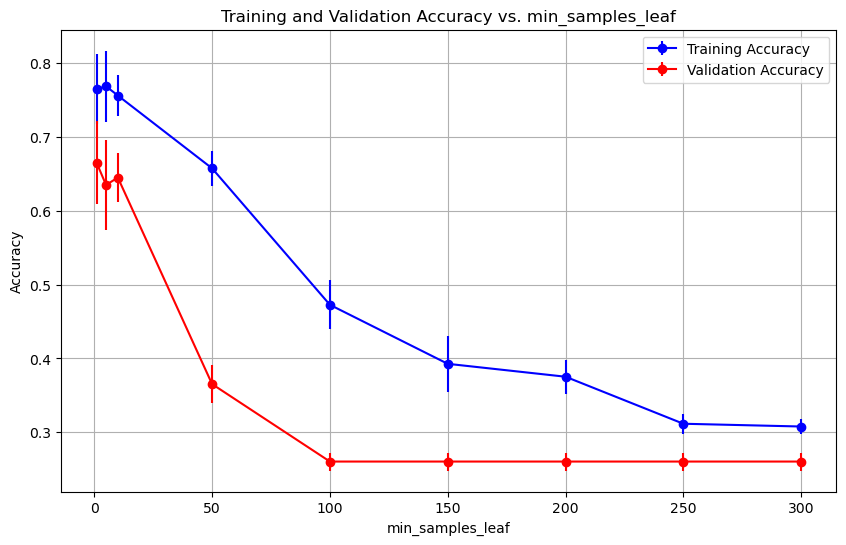

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


min_samples_leaf_values = [1, 5, 10,50,100,150,200,250,300]

dfs = []


for min_samples_leaf in min_samples_leaf_values:
    
    clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, criterion='gini', splitter='best')

    
    train_scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')
    val_scores = cross_val_score(clf, X_val, Y_val, cv=5, scoring='accuracy')

    
    avg_train_accuracy = np.mean(train_scores)
    std_train_accuracy = np.std(train_scores)
    avg_val_accuracy = np.mean(val_scores)
    std_val_accuracy = np.std(val_scores)

    
    train_accuracy = np.mean(train_scores)
    val_accuracy = np.mean(val_scores)

    
    df = pd.DataFrame({
        "min_samples_leaf": [min_samples_leaf],
        "train_accuracy": [train_accuracy],
        "avg_train_accuracy": [avg_train_accuracy],
        "std_train_accuracy": [std_train_accuracy],
        "val_accuracy": [val_accuracy],
        "avg_val_accuracy": [avg_val_accuracy],
        "std_val_accuracy": [std_val_accuracy]
    })

    
    dfs.append(df)

result_df = pd.concat(dfs, ignore_index=True)

print("Results Table:")
print(result_df)


plt.figure(figsize=(10, 6))
plt.errorbar(result_df["min_samples_leaf"], result_df["train_accuracy"], yerr=result_df["std_train_accuracy"], marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.errorbar(result_df["min_samples_leaf"], result_df["val_accuracy"], yerr=result_df["std_val_accuracy"], marker='o', linestyle='-', color='r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



   max_features  Train Accuracy  Validation Accuracy  Average Train Accuracy  \
0             5             1.0                0.920                 0.93500   
1            10             1.0                0.925                 0.93625   
2            20             1.0                0.940                 0.94625   
3            40             1.0                0.950                 0.94500   
4            80             1.0                0.950                 0.93500   
5           160             1.0                0.945                 0.93125   

   Std Train Accuracy  Average Val Accuracy  Std Val Accuracy  
0            0.010155                 0.840          0.012247  
1            0.013346                 0.860          0.051478  
2            0.010897                 0.845          0.048477  
3            0.014470                 0.870          0.043012  
4            0.009354                 0.885          0.060415  
5            0.019764                 0.895          0.

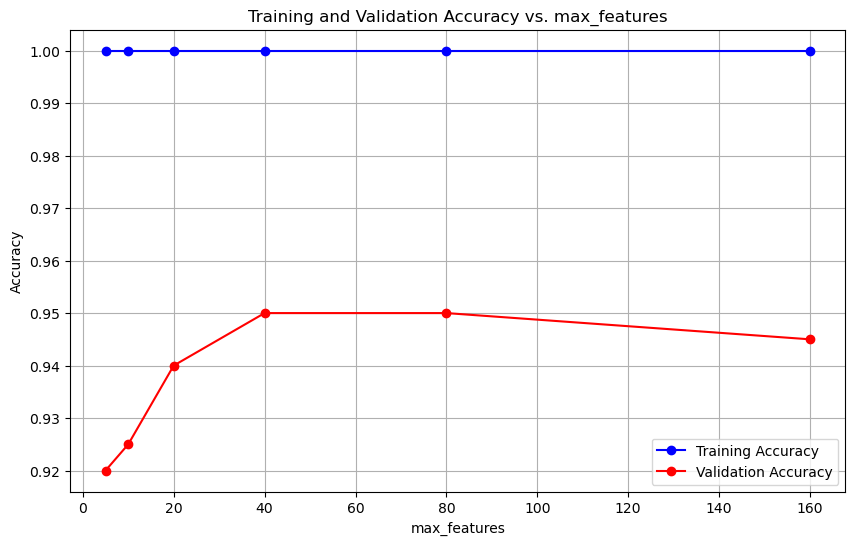

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


max_features_values = [5, 10, 20, 40, 80, 160]


train_accuracies = []
val_accuracies = []
avg_train_accuracies = []
std_train_accuracies = []
avg_val_accuracies = []
std_val_accuracies = []

for max_features in max_features_values:
    clf = RandomForestClassifier(max_features=max_features, n_estimators=100, random_state=42)

    train_scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')
    val_scores = cross_val_score(clf, X_val, Y_val, cv=5, scoring='accuracy')

    avg_train_acc = np.mean(train_scores)
    std_train_acc = np.std(train_scores)
    avg_val_acc = np.mean(val_scores)
    std_val_acc = np.std(val_scores)

    clf.fit(X_train, Y_train)
    train_accuracy = np.mean(clf.predict(X_train) == Y_train)
    val_accuracy = np.mean(clf.predict(X_val) == Y_val)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    avg_train_accuracies.append(avg_train_acc)
    std_train_accuracies.append(std_train_acc)
    avg_val_accuracies.append(avg_val_acc)
    std_val_accuracies.append(std_val_acc)

results_df = pd.DataFrame({
    "max_features": max_features_values,
    "Train Accuracy": train_accuracies,
    "Validation Accuracy": val_accuracies,
    "Average Train Accuracy": avg_train_accuracies,
    "Std Train Accuracy": std_train_accuracies,
    "Average Val Accuracy": avg_val_accuracies,
    "Std Val Accuracy": std_val_accuracies
})

print(results_df)

plt.figure(figsize=(10, 6))
plt.plot(max_features_values, train_accuracies, marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(max_features_values, val_accuracies, marker='o', linestyle='-', color='r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy vs. max_features')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=1)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion= 'entropy', random_state=42)
classifier.fit(X_train, Y_train)

y_pred=classifier.predict(X_val)

In [18]:
accuracy_score(y_pred,Y_val)

0.95


Results Table:
   n_estimators  avg_train_accuracy  std_train_accuracy  avg_val_accuracy  \
0            10             0.87625            0.033166             0.750   
1            50             0.93500            0.031275             0.855   
2           100             0.94625            0.022220             0.875   
3           150             0.95000            0.020156             0.870   
4           200             0.94875            0.021433             0.865   
5           250             0.95125            0.017410             0.880   
6           300             0.95250            0.018371             0.865   

   std_val_accuracy  train_accuracy  val_accuracy  
0          0.065192         0.99875         0.895  
1          0.033166         1.00000         0.970  
2          0.057009         1.00000         0.955  
3          0.048477         1.00000         0.955  
4          0.025495         1.00000         0.955  
5          0.024495         1.00000         0.950  
6  

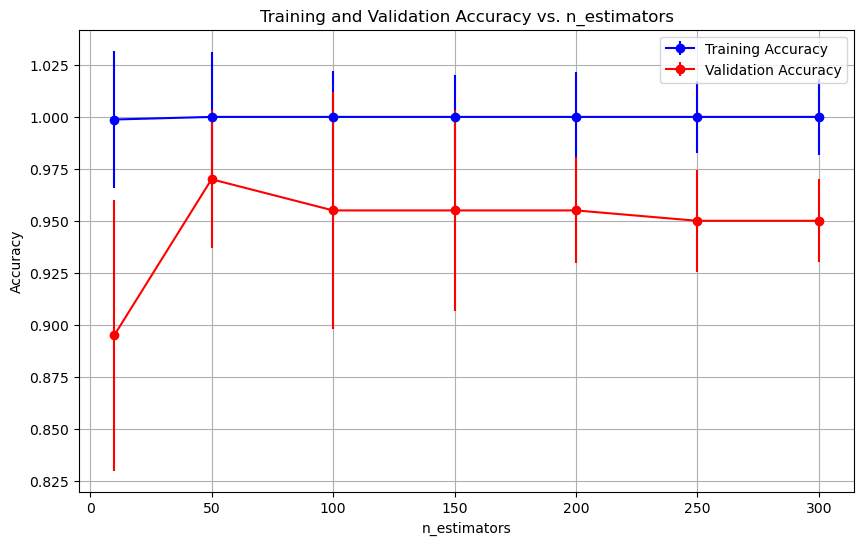

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

n_estimators_values = [10, 50, 100, 150, 200, 250, 300]

# Lists to store results
results_table = []

# Use 5-Fold Cross-Validation
for n_estimators in n_estimators_values:
    # Create RandomForestClassifier with current parameter value
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Perform 5-fold cross-validation
    train_scores = cross_val_score(rf_classifier, X_train, Y_train, cv=5, scoring='accuracy')
    val_scores = cross_val_score(rf_classifier, X_val, Y_val, cv=5, scoring='accuracy')

    # Calculate average and standard deviation for training and validation accuracies
    avg_train_accuracy = np.mean(train_scores)
    std_train_accuracy = np.std(train_scores)
    avg_val_accuracy = np.mean(val_scores)
    std_val_accuracy = np.std(val_scores)

    # Fit the classifier on the training data
    rf_classifier.fit(X_train, Y_train)

    # Predict on the training and validation data
    Y_pred_train = rf_classifier.predict(X_train)
    Y_pred_val = rf_classifier.predict(X_val)

    # Calculate accuracy scores
    train_accuracy = np.mean(Y_pred_train == Y_train)
    val_accuracy = np.mean(Y_pred_val == Y_val)

    # Collect results
    results_table.append({
        'n_estimators': n_estimators,
        'avg_train_accuracy': avg_train_accuracy,
        'std_train_accuracy': std_train_accuracy,
        'avg_val_accuracy': avg_val_accuracy,
        'std_val_accuracy': std_val_accuracy,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy
    })

# Convert results table to DataFrame
results_df = pd.DataFrame(results_table)

# Report Results
print("\nResults Table:")
print(results_df)

# Draw a Line Figure
plt.figure(figsize=(10, 6))
plt.errorbar(results_df['n_estimators'], results_df['train_accuracy'], yerr=results_df['std_train_accuracy'], marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.errorbar(results_df['n_estimators'], results_df['val_accuracy'], yerr=results_df['std_val_accuracy'], marker='o', linestyle='-', color='r', label='Validation Accuracy')

plt.title('Training and Validation Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



Results DataFrame:
   min_samples_leaf  Train Accuracy  Val Accuracy  Avg Train Accuracy  \
0                 5         0.99000         0.950             0.94125   
1                10         0.97250         0.930             0.93625   
2                20         0.93750         0.920             0.91000   
3                40         0.89375         0.880             0.77500   
4                80         0.54875         0.575             0.43250   
5               160         0.31000         0.330             0.22875   

   Std Train Accuracy  Avg Val Accuracy  Std Val Accuracy  
0            0.015104             0.815          0.064420  
1            0.014470             0.550          0.054772  
2            0.024559             0.280          0.010000  
3            0.018957             0.280          0.010000  
4            0.032210             0.280          0.010000  
5            0.030259             0.280          0.010000  


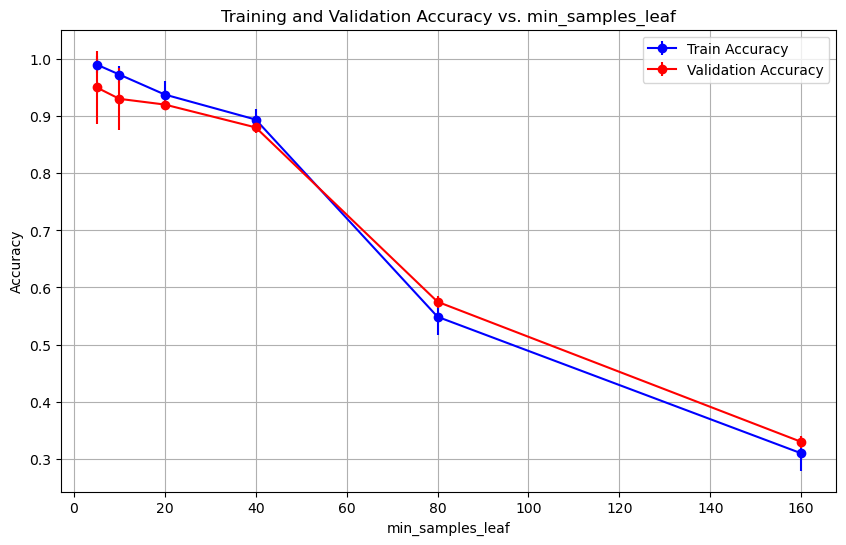

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have X and Y data
# X_train, Y_train = preprocess_data(X_train_raw, Y_train_raw)

# Define a range of min_samples_leaf values to evaluate
min_samples_leaf_values = [5, 10, 20, 40, 80, 160]

# Create lists to store accuracy values
min_samples_leaf_list = []
train_accuracy_list = []
val_accuracy_list = []
avg_train_accuracy_list = []
std_train_accuracy_list = []
avg_val_accuracy_list = []
std_val_accuracy_list = []

# Loop through different min_samples_leaf values
for min_samples_leaf in min_samples_leaf_values:
    # Create a RandomForestClassifier with the current parameter value
    rf_classifier = RandomForestClassifier(n_estimators=100, min_samples_leaf=min_samples_leaf, random_state=42)

    # Fit the classifier on the training data
    rf_classifier.fit(X_train, Y_train)

    # Predict on the training and validation data
    Y_pred_train = rf_classifier.predict(X_train)
    Y_pred_val = rf_classifier.predict(X_val)

    # Calculate accuracy scores
    train_accuracy = np.mean(Y_pred_train == Y_train)
    val_accuracy = np.mean(Y_pred_val == Y_val)

    # Perform 5-fold cross-validation
    train_scores = cross_val_score(rf_classifier, X_train, Y_train, cv=5, scoring='accuracy')
    val_scores = cross_val_score(rf_classifier, X_val, Y_val, cv=5, scoring='accuracy')

    # Calculate average and standard deviation for training and validation accuracies
    avg_train_accuracy = np.mean(train_scores)
    std_train_accuracy = np.std(train_scores)
    avg_val_accuracy = np.mean(val_scores)
    std_val_accuracy = np.std(val_scores)

    # Append values to the lists
    min_samples_leaf_list.append(min_samples_leaf)
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)
    avg_train_accuracy_list.append(avg_train_accuracy)
    std_train_accuracy_list.append(std_train_accuracy)
    avg_val_accuracy_list.append(avg_val_accuracy)
    std_val_accuracy_list.append(std_val_accuracy)

# Create a DataFrame
results_df = pd.DataFrame({
    "min_samples_leaf": min_samples_leaf_list,
    "Train Accuracy": train_accuracy_list,
    "Val Accuracy": val_accuracy_list,
    "Avg Train Accuracy": avg_train_accuracy_list,
    "Std Train Accuracy": std_train_accuracy_list,
    "Avg Val Accuracy": avg_val_accuracy_list,
    "Std Val Accuracy": std_val_accuracy_list
})

# Print the results table
print("\nResults DataFrame:")
print(results_df)

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.errorbar(results_df["min_samples_leaf"], results_df["Train Accuracy"], yerr=results_df["Std Train Accuracy"], marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.errorbar(results_df["min_samples_leaf"], results_df["Val Accuracy"], yerr=results_df["Std Val Accuracy"], marker='o', linestyle='-', color='r', label='Validation Accuracy')

plt.title('Training and Validation Accuracy vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
test = pd.read_csv('news-test.csv')
test

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...
...,...,...
730,1923,eu to probe alitalia state aid the european ...
731,373,u2 to play at grammy awards show irish rock ba...
732,1704,sport betting rules in spotlight a group of mp...
733,206,alfa romeos to get gm engines fiat is to sto...


In [22]:
x_test=tfidf.transform(test['Text'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
Model = RandomForestClassifier(n_estimators=120, random_state=42)
Model.fit(X_train, y_train)
y_pred = Model.predict(x_test)
test['Predicted Category'] = y_pred
test_labels = Model.predict(x_test)

In [24]:
test

,ArticleId,Text,Predicted Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,sport
3,459,india s reliance family feud heats up the ongo...,business
4,1020,boro suffer morrison injury blow middlesbrough...,sport
...,...,...,...
730,1923,eu to probe alitalia state aid the european ...,business
731,373,u2 to play at grammy awards show irish rock ba...,entertainment
732,1704,sport betting rules in spotlight a group of mp...,politics
733,206,alfa romeos to get gm engines fiat is to sto...,business


In [25]:
print(f'Acuracy of the Model: {Model.score(X_test, y_test)*100}%')

Acuracy of the Model: 93.5%


In [26]:
test_labels_df = pd.DataFrame({'ArticleId': test['ArticleId'], 'Category': y_pred})
test_labels_df.to_csv('test_labels.csv', index=False)
print(f'Acuracy of the Model: {Model.score(X_test, y_test)*100}%')

Acuracy of the Model: 93.5%


In [27]:
test_labels_df = pd.DataFrame({'ArticleId': test['ArticleId'], 'Category': test_labels})
test_labels_df.to_csv('test_labels.csv', index=False)

In [28]:
Model2 = DecisionTreeClassifier(random_state=18)
Model2.fit(X_train, y_train)
y_pred = Model2.predict(x_test)
print(f'Acuracy of the Model2: {Model2.score(X_test, y_test)*100}%')
test_labels_df_1 = pd.DataFrame({'ArticleId': test['ArticleId'], 'Category': y_pred})
test_labels_df_1.to_csv('test_labels1.csv', index=False)

Acuracy of the Model2: 79.5%


In [29]:
from sklearn.ensemble import AdaBoostClassifier
Model3 = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
Model3.fit(X_train, y_train)
y_pred = Model3.predict(x_test)
print(f'Acuracy of the Model3: {Model3.score(X_test, y_test)*100}%')
test_labels_df_2 = pd.DataFrame({'ArticleId': test['ArticleId'], 'Category': y_pred})
test_labels_df_2.to_csv('test_labels2.csv', index=False)

Acuracy of the Model3: 89.5%


In [30]:
from sklearn.ensemble import AdaBoostClassifier
Model4 = AdaBoostClassifier(n_estimators=300, algorithm="SAMME", random_state=0)
Model4.fit(X_train, y_train)
y_pred = Model3.predict(x_test)
print(f'Acuracy of the Model3: {Model3.score(X_test, y_test)*100}%')
test_labels_df_3 = pd.DataFrame({'ArticleId': test['ArticleId'], 'Category': y_pred})
test_labels_df_3.to_csv('test_labels3.csv', index=False)

Acuracy of the Model3: 89.5%
